In [1]:
import sys
sys.path.insert(0, '/Users/fbickfordsmith/Google Drive/Project/attention')
from contexts_statistics import *

In [2]:
'''
IPython extension to reload modules before executing user code.
https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
'''
%load_ext autoreload
%autoreload 2

In [283]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['o', 'D', 's', 'X']
styles = {
    '0': dict(marker=markers[0], color=colors[0]),
    '1': dict(marker=markers[1], color=colors[1]),
    '2': dict(marker=markers[2], color=colors[2]),
    '3': dict(marker=markers[3], color=colors[3]),
    'in': dict(label='in context', marker=markers[0], color=colors[0]),
    'out': dict(label='out of context', marker=markers[1], color=colors[1])}

In [166]:
def scatter_line(ax, x, y, style):
    ax.scatter(x, y, **style)
    ax.vlines(x, ymin=0, ymax=y, color=style['color'])

In [183]:
def plot_change_acc(df, x):
    fig, ax = plt.subplots()
    scatter_line(ax, x, df['incontext_change'], styles['in'])
    scatter_line(ax, x, df['outofcontext_change'], styles['out'])
    plt.ylabel('Accuracy change')
    plt.legend(title='Source of test examples')
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
    plt.tight_layout()
    return fig, ax

### Semantic contexts

In [170]:
sem_labels = ['kitchen', 'dogs', 'cats', 'wearable', 'transport', 'birds']
sem_labels_plot = ['', 'kitchen\nitems', 'dogs', 'cats', 'wearable\nitems', 'land\ntransport', 'birds']
df_sem = context_summary('sem')
df_sem.insert(0, 'label', sem_labels)
df_sem

,label,size,similarity,incontext_base,outofcontext_base,incontext_trained,outofcontext_trained,incontext_change,outofcontext_change,num_epochs
0,kitchen,35,0.446404,0.512884,0.650968,0.643868,0.603047,0.130984,-0.047921,39
1,dogs,129,0.553892,0.661100,0.643919,0.684260,0.623847,0.023160,-0.020072,35
2,cats,13,0.854177,0.708477,0.645314,0.773148,0.636478,0.064671,-0.008836,41
3,wearable,56,0.432272,0.535303,0.652710,0.656491,0.573079,0.121188,-0.079630,51
4,transport,45,0.428524,0.715678,0.642858,0.755700,0.634381,0.040023,-0.008477,23
5,birds,60,0.534972,0.824636,0.634741,0.862546,0.615876,0.037910,-0.018866,45


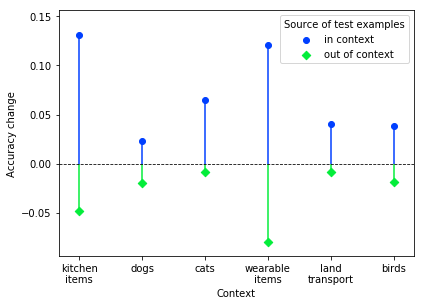

In [185]:
fig, ax = plot_change_acc(df_sem, range(len(df_sem)))
ax.set_xticklabels(sem_labels_plot)
plt.xlabel('Context')
# plt.savefig('semcontexts_acc_change.png', dpi=200)
plt.show()

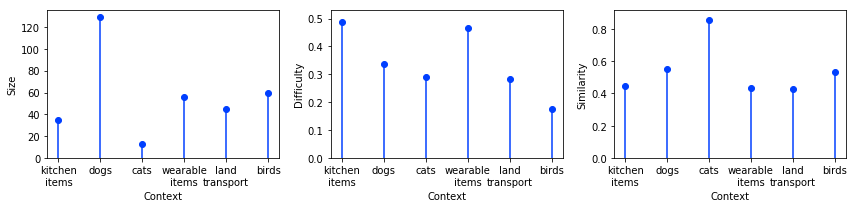

In [174]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

scatter_line(ax[0], range(len(df_sem)), df_sem['size'], styles['in'])
scatter_line(ax[1], range(len(df_sem)), 1-df_sem['incontext_base'], styles['in'])
scatter_line(ax[2], range(len(df_sem)), df_sem['similarity'], styles['in'])

# ax[0].bar(range(len(df_sem)), df_sem['size'], alpha=0.7)
# ax[1].bar(range(len(df_sem)), df_sem['incontext_base'], alpha=0.7)
# ax[2].bar(range(len(df_sem)), df_sem['similarity'], alpha=0.7)

ax[0].set_ylabel('Size')
ax[1].set_ylabel('Difficulty')
ax[2].set_ylabel('Similarity')

for a in ax:
    a.set_xticklabels(sem_labels_plot)
    a.set_xlabel('Context')
    a.set_ylim(bottom=0)
    
plt.tight_layout()
# plt.savefig('semcontexts_stats.png', dpi=200)
plt.show()

### Difficulty contexts

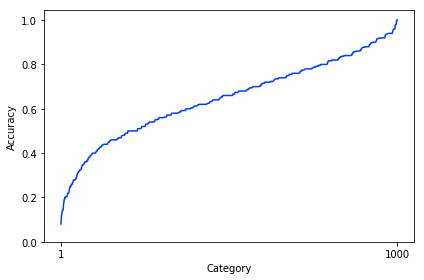

In [271]:
fig, ax = plt.subplots()
plt.plot(range(1000), sorted(df_base['accuracy']))
plt.xticks((0, 999))
ax.set_xticklabels((1, 1000))
# plt.ylim((0, 1))
plt.ylim(bottom=0)
plt.xlabel('Category')
plt.ylabel('Accuracy')
plt.tight_layout()
# plt.savefig('baseline_classwise_acc_line.png', dpi=200)
plt.show()

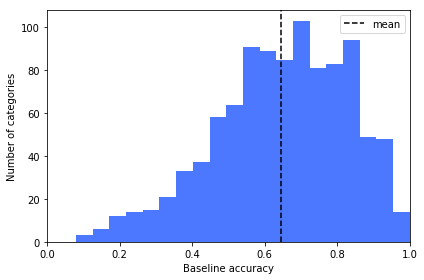

In [272]:
plt.hist(df_base['accuracy'], bins=20, alpha=0.7)#, color='w', edgecolor='black') #alpha=0.5)
plt.axvline(mean_acc, color='k', linestyle='--', label='mean')#, linewidth=1.2)
# plt.axvline(mean_acc-std_acc, color='r', linestyle='--')
# plt.axvline(mean_acc+std_acc, color='r', linestyle='--')
plt.xlim((0, 1))
plt.xlabel('Baseline accuracy')
plt.ylabel('Number of categories')
plt.legend()
plt.tight_layout()
plt.savefig('baseline_classwise_acc_hist.png', dpi=200)
plt.show()

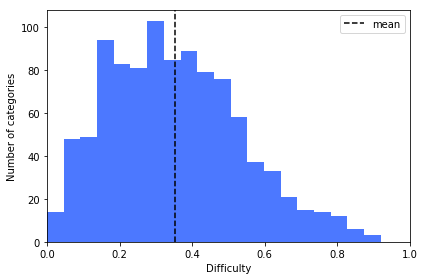

In [274]:
plt.hist(1-df_base['accuracy'], bins=20, alpha=0.7)#, color='w', edgecolor='black') #alpha=0.5)
plt.axvline(np.mean(1-df_base['accuracy']), color='k', linestyle='--', label='mean')#, linewidth=1.2)
# plt.axvline(mean_acc-std_acc, color='r', linestyle='--')
# plt.axvline(mean_acc+std_acc, color='r', linestyle='--')
plt.xlim((0, 1))
plt.xlabel('Difficulty')
plt.ylabel('Number of categories')
plt.legend()
plt.tight_layout()
# plt.savefig('baseline_classwise_acc_hist.png', dpi=200)
plt.show()

In [191]:
df_diff = context_summary('diff')
# df_diff.sort_values('incontext_base', inplace=True)

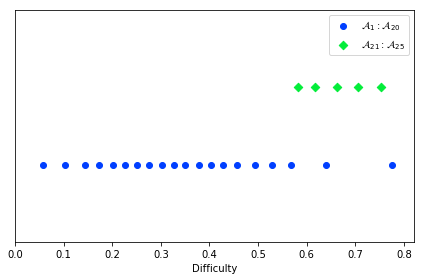

In [253]:
plt.scatter(1-df_diff['incontext_base'][:20], np.ones(20), **styles['0'], label=r'$\mathcal{A}_1 : \mathcal{A}_{20}$')
plt.scatter(1-df_diff['incontext_base'][20:], 2*np.ones(5), **styles['1'], label=r'$\mathcal{A}_{21} : \mathcal{A}_{25}$')
plt.xlim(left=0)
plt.ylim((0, 3))
plt.xlabel('Difficulty')
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()#title='Contexts')
plt.tight_layout()
# plt.savefig('diffcontexts_baseline.png', dpi=200)
plt.show()

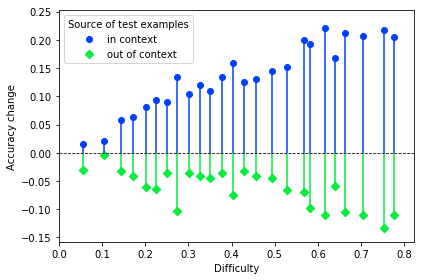

In [254]:
fig, ax = plot_change_acc(df_diff, list(1-df_diff['incontext_base']))
plt.xlabel('Difficulty')
plt.xlim(left=0)
plt.tight_layout()
# plt.savefig('diffcontexts_acc_change.png', dpi=200)
plt.show()

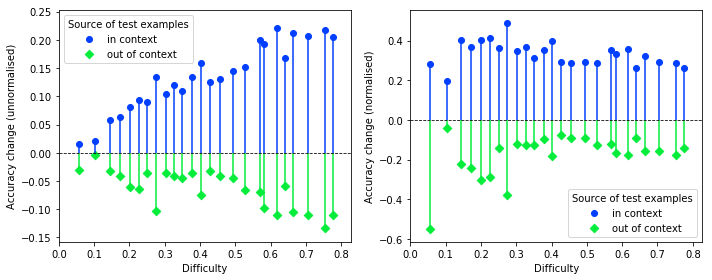

In [269]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

difficulty = 1-df_diff['incontext_base']
x = list(1-df_diff['incontext_base'])

scatter_line(ax[0], x, df_diff['incontext_change'], styles['in'])
scatter_line(ax[0], x, df_diff['outofcontext_change'], styles['out'])
scatter_line(ax[1], x, df_diff['incontext_change']/difficulty, styles['in'])
scatter_line(ax[1], x, df_diff['outofcontext_change']/difficulty, styles['out'])

ax[0].set_ylabel('Accuracy change (unnormalised)')
ax[1].set_ylabel('Accuracy change (normalised)')
ax[0].legend(title='Source of test examples')
ax[1].legend(title='Source of test examples')
ax[0].axhline(y=0, color='k', linestyle='--', linewidth=0.8)
ax[1].axhline(y=0, color='k', linestyle='--', linewidth=0.8)

# fig, ax = plot_change_acc(df_diff, list(1-df_diff['incontext_base']))

for a in ax:
    a.set_xlabel('Difficulty')
    a.set_xlim(left=0)
    
plt.tight_layout()
plt.savefig('diffcontexts_acc_change_norm.png', dpi=200)
plt.show()

### Size contexts

In [275]:
df_size = context_summary('size')
df_size

,size,similarity,incontext_base,outofcontext_base,incontext_trained,outofcontext_trained,incontext_change,outofcontext_change,num_epochs
0,1,1.000000,0.660000,0.646121,0.800000,0.642421,0.140000,-0.003700,100
1,2,0.338592,0.650000,0.646127,0.840000,0.636026,0.190000,-0.010102,100
2,4,0.603180,0.685707,0.645976,0.895288,0.617000,0.209581,-0.028976,100
3,8,0.414381,0.664634,0.645986,0.890863,0.581055,0.226229,-0.064931,100
4,16,0.462032,0.671334,0.645725,0.903394,0.518306,0.232060,-0.127420,100
5,32,0.407476,0.658227,0.645735,0.847840,0.495406,0.189613,-0.150330,100
6,64,0.418547,0.662271,0.645032,0.807429,0.527618,0.145158,-0.117413,100
7,128,0.427468,0.663694,0.643558,0.727816,0.620294,0.064123,-0.023263,23
8,256,0.421248,0.656843,0.642451,0.708441,0.620178,0.051598,-0.022273,41


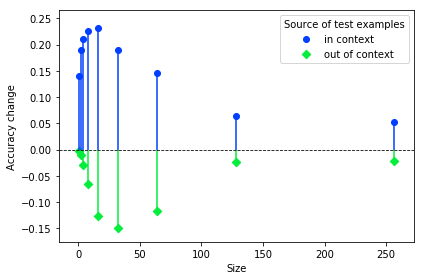

In [278]:
fig, ax = plot_change_acc(df_size, list(df_size['size']))
plt.xlabel('Size')
plt.tight_layout()
plt.savefig('sizecontexts_acc_change.png', dpi=200)
plt.show()

### Similarity contexts